# KoNLPy 한국어 처리 패키지

KoNLPy는 한국어 정보처리를 위한 파이썬 패키지이다 

In [1]:
# pip install konlpy

In [2]:
import konlpy
konlpy.__version__

'0.5.2'

## 한국어 말뭉치

KoNLPy에서는 대한민국 헌법 말뭉치인 `kolaw`와 국회법안 말뭉치인 `kobill`을 제공한다. 각 말뭉치가 포함하는 파일의 이름은 `fields` 메서드로 알 수 있고 `open` 메서드로 해당 파일의 텍스트를 읽어들인다.

In [3]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [4]:
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [5]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [6]:
d = kobill.open('1809890.txt').read()
print(d[:40])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


## 형태소 분석

KoNLPy는 다음과 같은 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았다.

* Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.
  * http://semanticweb.kaist.ac.kr/hannanum/
* Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
  * http://kkma.snu.ac.kr/
* Komoran: 코모란. Shineware에서 개발.
  * https://github.com/shin285/KOMORAN
* Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.(windows에서 지원 안함)
  * https://bitbucket.org/eunjeon/mecab-ko
* Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
  * https://github.com/open-korean-text/open-korean-text

여기에서는 한나눔, 꼬꼬마, 오픈코리안텍스트 형태소만 분석.

In [7]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

이 클래스들은 다음과 같은 메서드를 공통적으로 제공한다.

* `nouns` : 명사 추출
* `morphs` : 형태소 추출
* `pos` : 품사 부착

### 명사 추출

문자열에서 명사만 추출하려면 `noun` 명령을 사용한다.

In [8]:
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [9]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [10]:
# komoran은 빈줄이 있으면 에러가 남
komoran.nouns("\n".join([s for s in c[:40].split("\n") if s]))

['대한민국', '헌법', '역사', '전통', '국민', '운동']

In [11]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

### 형태소 추출

명사 뿐 아니라 모든 품사의 형태소를 알아내려면 `morphs`라는 명령을 사용한다.

In [12]:
hannanum.morphs(c[:40])

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

In [13]:
kkma.morphs(c[:40])

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [14]:
# komoran은 빈줄이 있으면 에러가 남
komoran.morphs("\n".join([s for s in c[:40].split("\n") if s]))

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [15]:
okt.morphs(c[:40])

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

### 품사 태깅

`pos` 명령을 사용하면 품사 부착을 한다. 

한국어 품사 태그세트로는 "21세기 세종계획 품사 태그세트"를 비롯하여 다양한 품사 태그세트가 있다. 형태소 분석기마다 사용하는 품사 태그가 다르므로 각 형태소 분석기에 대한 문서를 참조한다.

In [16]:
hannanum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [17]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

In [18]:
# komoran은 빈줄이 있으면 에러가 남
komoran.pos("\n".join([s for s in c[:40].split("\n") if s]))

[('대한민국', 'NNP'),
 ('헌법', 'NNP'),
 ('유구', 'XR'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKB'),
 ('빛나', 'VV'),
 ('는', 'ETM'),
 ('우리', 'NP'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('국민', 'NNP'),
 ('은', 'JX'),
 ('3', 'SN'),
 ('·', 'SP'),
 ('1', 'SN'),
 ('운동', 'NNP'),
 ('으로', 'JKB')]

In [19]:
okt.pos(c[:40])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa')]

부착되는 품사 태그의 기호와 의미는 `tagset` 속성으로 확인할 수 있다.

In [20]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [21]:
import pandas as pd
tagsets = pd.DataFrame()
N = 67
tagsets["Hannanum-기호"] = list(hannanum.tagset.keys()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Hannanum-품사"] = list(hannanum.tagset.values()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
tagsets["Komoran-기호"] = list(komoran.tagset.keys()) + list("*" * (N - len(komoran.tagset)))
tagsets["Komoran-품사"] = list(komoran.tagset.values()) + list("*" * (N - len(komoran.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))
tagsets

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,Komoran-기호,Komoran-품사,OKT-기호,OKT-품사
0,E,어미,EC,연결 어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,EF,종결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,EP,선어말어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,ETM,관형형 전성 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,ETN,명사형 전성 어미,Determiner,관형사
...,...,...,...,...,...,...,...,...
62,*,*,XPV,용언 접두사,*,*,*,*
63,*,*,XR,어근,*,*,*,*
64,*,*,XSA,형용사 파생 접미사,*,*,*,*
65,*,*,XSN,명사파생 접미사,*,*,*,*


koNLPy의 형태소 분석기와 NLTK의 Text 클래스를 결합하여 NLTK 기능을 사용할 수도 있다.

In [22]:
from nltk import Text
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

kolaw = Text(okt.nouns(c), name="kolaw")
kolaw.plot(30)
plt.show()

<Figure size 640x480 with 1 Axes>

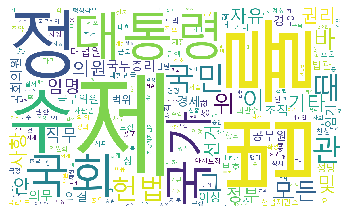

In [28]:
# ! pip install wordcloud
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = 'c:/Windows/Fonts/malgun.ttf'

wc = WordCloud(width = 1500, height = 900, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

In [29]:
# Mac 한글 폰트설정
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False